In [62]:
import numpy as np
import pandas as pd

import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab

# Bank Marketing

# Abstract: 


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

# goal

The classification goal is to predict if the client will subscribe a term deposit.

# Sources

The dataset is public available for research.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [63]:
bank = pd.read_csv('bank-full.csv', sep = ';')

In [64]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [65]:
bank.shape

(45211, 17)

In [66]:
#  Find missing values of each feature in the data set.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [67]:
bank.isnull().any() # one way to search for null values

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

Fortunately, there are no missing values. If there were missing values we will have to fill them with the median, mean or mode.

In [68]:
bank.describe().astype(np.int64)

,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


Mean Age is aproximately 40 years old. (Minimum: 18 years old and Maximum: 95 years old.)

The mean balance is 3,044. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset. and compared to the mean (1362).

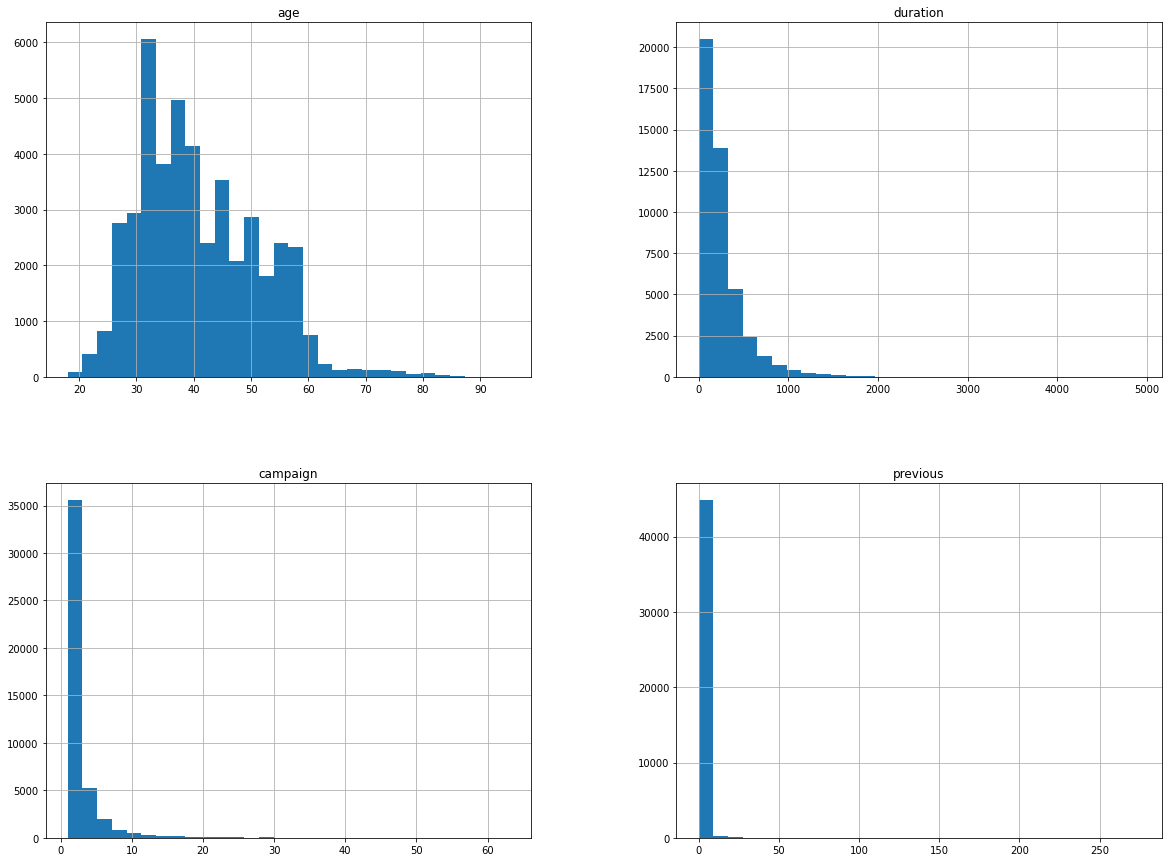

In [69]:
bank[['age','duration','campaign','previous']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

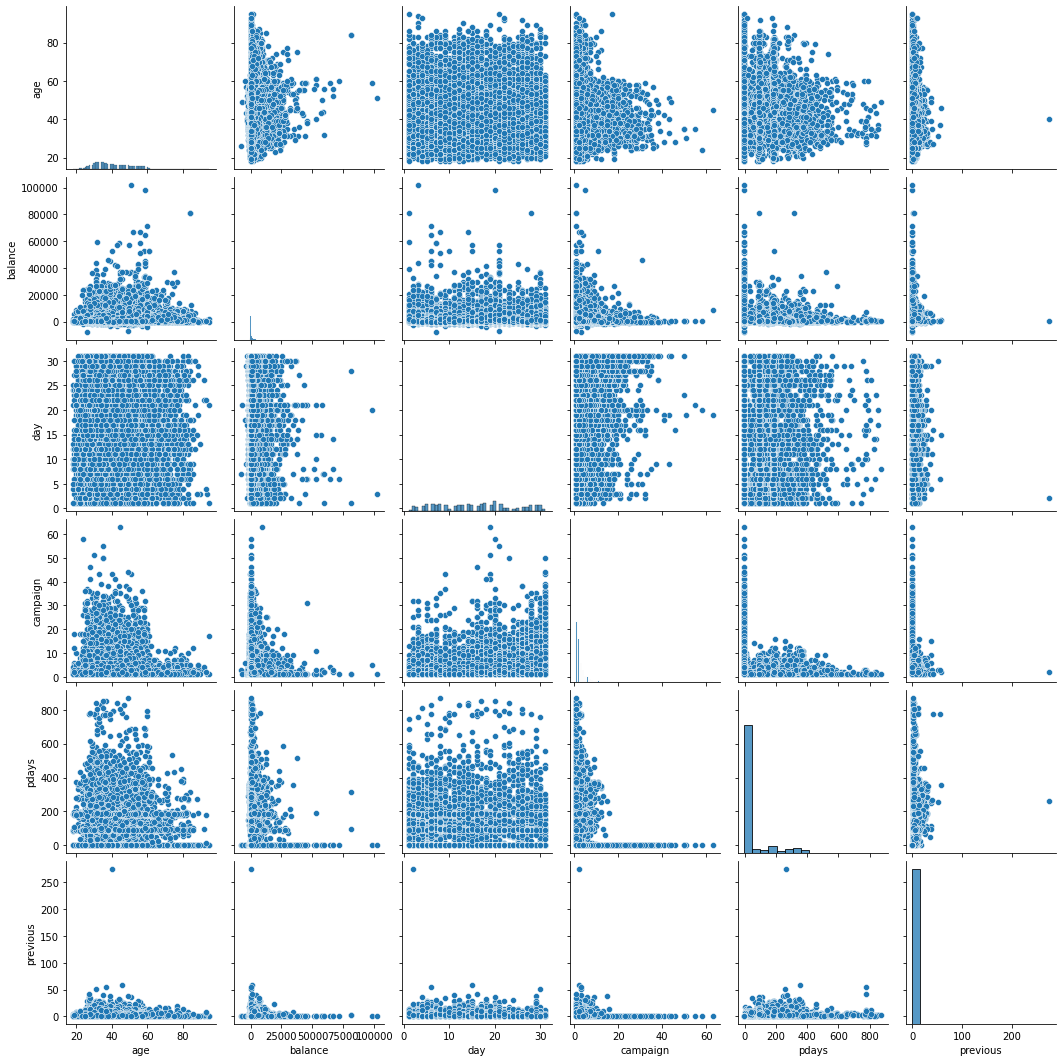

In [119]:
sns.pairplot(bank)

# The categorical variables

In [71]:
category_features = bank.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(bank[col].unique()) , "values):\n", np.sort(bank[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


Checking out the categories and their respective counts in each feature

In [79]:
print("Job:",bank.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank.month.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank.y.value_counts(),sep = '\n')
print("-"*40)

Job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
----------------------------------------
Marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
----------------------------------------
Education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
----------------------------------------
Default:
no     44396
yes      815
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes    25130
no     20081
Name: housing, dtype: int64
----------------------------------------
Personal loan:
no     37967
yes     7244
Name: loan, dtype: int64
----------------------------------------
Contact:
cellular     29285
unknown      13020
telephone

As written in the dataset description, the duration column should be dropped since it includes an information which cannot be known before the call to the client.

In [82]:
bank=bank.drop('duration', axis=1)

# Data Cleaning and Feature Engineering

In [86]:
df_clean = bank.copy()

In [87]:
df_clean.describe().astype(np.int64)

,age,balance,day,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211
mean,40,1362,15,2,40,0
std,10,3044,8,3,100,2
min,18,-8019,1,1,-1,0
25%,33,72,8,1,-1,0
50%,39,448,16,2,-1,0
75%,48,1428,21,3,-1,0
max,95,102127,31,63,871,275


transform day into a categorical feature.

In [88]:
df_clean['day'] = df_clean['day'].astype(object)

In [91]:
df_clean.describe()

,age,balance,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


<AxesSubplot:>

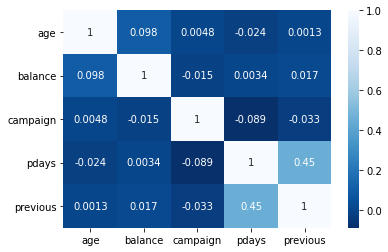

In [92]:
sns.heatmap(df_clean.corr() ,cmap='Blues_r', annot=True)

# Age analysis

<AxesSubplot:xlabel='age'>

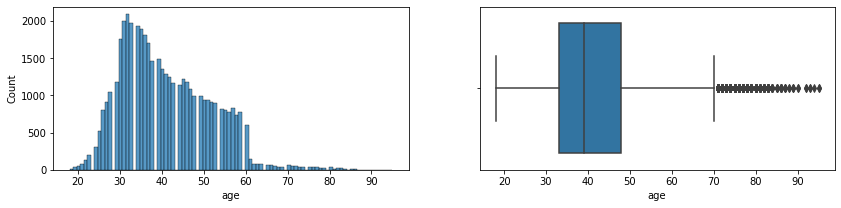

In [93]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='age', data=df_clean)
sns.boxplot(ax=ax[1], x='age', data=df_clean)

In order to remove outliers from this skewed distribution, we will define a function to get the upper and lower limits based on the IQR

In [95]:
def get_upper_lower(data):
    percentile25 = data.quantile(0.25)
    percentile75 = data.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit, lower_limit



In [96]:
upper_limit, lower_limit = get_upper_lower(df_clean['age'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  70.5
lower_limit:  10.5


In [97]:
len(df_clean)

45211

In [98]:
df_clean = df_clean[(df_clean['age'] > lower_limit ) & (df_clean['age'] < upper_limit)]

<AxesSubplot:xlabel='age'>

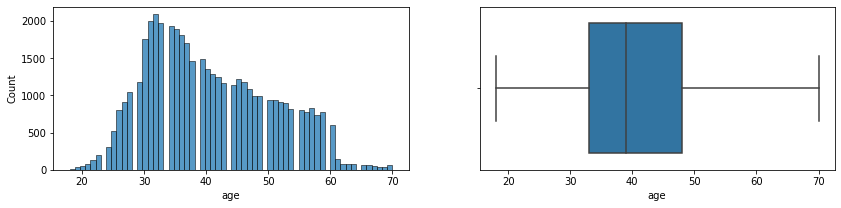

In [99]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='age', data=df_clean)
sns.boxplot(ax=ax[1], x='age', data=df_clean)

In [100]:
print('We removed {} outliers!'.format(len(bank)-len(df_clean)))

We removed 487 outliers!


# balance

<AxesSubplot:xlabel='balance'>

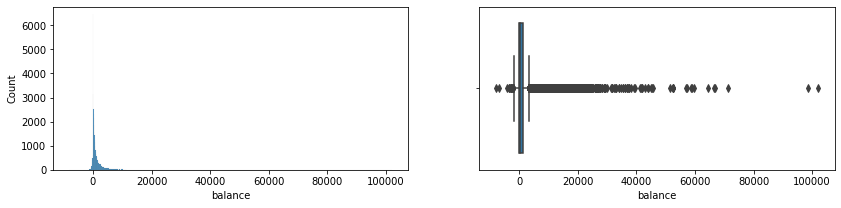

In [101]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean)
sns.boxplot(ax=ax[1], x='balance', data=df_clean)

In [102]:
upper_limit, lower_limit = get_upper_lower(df_clean['balance'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  3413.5
lower_limit:  -1934.5


<AxesSubplot:xlabel='balance'>

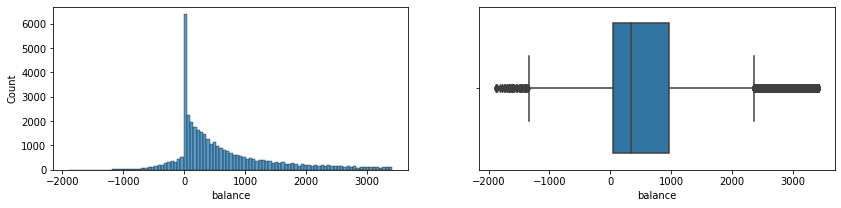

In [103]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean[ (df_clean['balance'] > lower_limit ) & (df_clean['balance'] < upper_limit )])
sns.boxplot(ax=ax[1], x='balance', data=df_clean[ (df_clean['balance'] > lower_limit ) & (df_clean['balance'] < upper_limit )])

In [104]:
df_clean = df_clean[ (df_clean['balance'] > lower_limit) & (df_clean['balance'] < upper_limit)]

<AxesSubplot:xlabel='balance'>

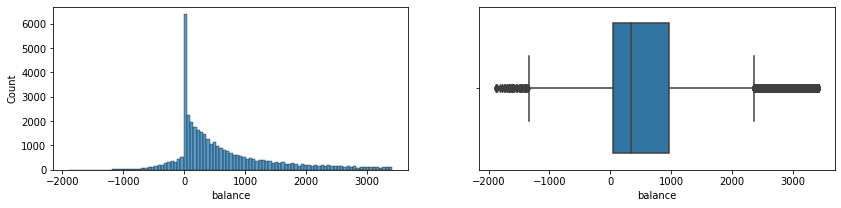

In [105]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean)
sns.boxplot(ax=ax[1], x='balance', data=df_clean)

In [108]:
print('We removed {} outliers!'.format(len(bank)-len(df_clean)))

We removed 5183 outliers!


# campaign

<AxesSubplot:xlabel='campaign'>

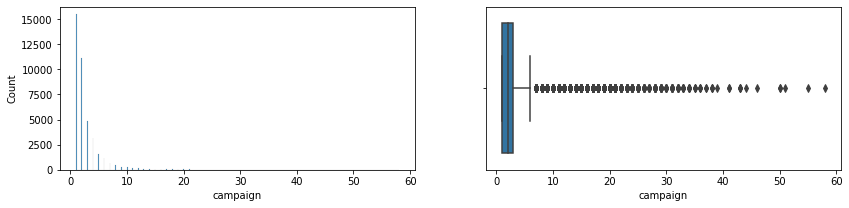

In [109]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='campaign', data=df_clean)
sns.boxplot(ax=ax[1], x='campaign', data=df_clean)

In [110]:
upper_limit, lower_limit = get_upper_lower(df_clean['campaign'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  6.0
lower_limit:  -2.0


In [111]:
#df_clean = df_clean[ (df_clean['campaign'] > lower_limit ) & (df_clean['campaign'] < upper_limit )]

In [112]:
df_clean = df_clean[df_clean['campaign'] <= 40]

<AxesSubplot:xlabel='campaign'>

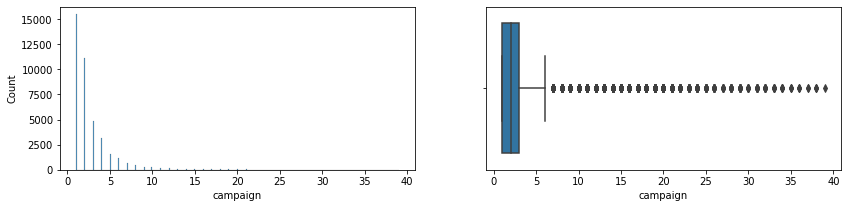

In [113]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='campaign', data=df_clean)
sns.boxplot(ax=ax[1], x='campaign', data=df_clean)

In [115]:
print('We removed {} outliers!'.format(len(bank)-len(df_clean)))

We removed 5195 outliers!


# pdays

<AxesSubplot:xlabel='pdays'>

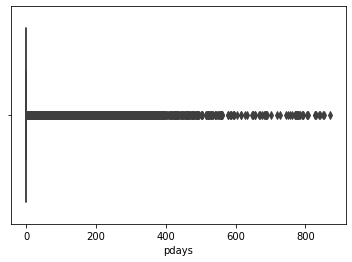

In [117]:
sns.boxplot(x='pdays', data=df_clean)

In [118]:
df_clean['pdays'].value_counts()

-1      32902
 182      130
 92       115
 91       102
 370       96
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 539, dtype: int64

Encoding -1 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

In [120]:
df_clean['prev_cont'] = df_clean['pdays'] ==-1
df_clean['prev_cont'] = df_clean['prev_cont'].replace([True,False],[1,0])

In [121]:
df_clean['pdays'] = df_clean['pdays'].replace(-1, 0)

In [122]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,prev_cont
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,0,unknown,no,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,0,unknown,no,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,0,unknown,no,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,0,unknown,no,1


<AxesSubplot:xlabel='prev_cont', ylabel='count'>

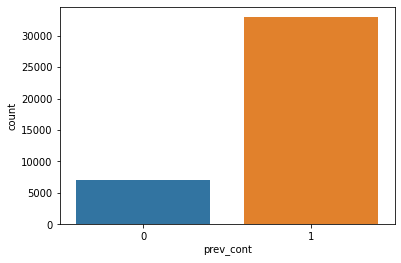

In [123]:
sns.countplot(x='prev_cont', data=df_clean)

converted -1 to 0 in pdays

# Exploratory Data Analysis

In [124]:
df=df_clean